<a href="https://colab.research.google.com/github/AkhilSai13/Automated-Stock-Trading-Bot/blob/main/LSTM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as y

In [ ]:
dataset = y.download('TCS.NS', start = '2010-01-01', end = '2015-01-01')
len(dataset)
#dataset.head()


[*********************100%***********************]  1 of 1 completed


1233

Text(0.5, 1.0, 'TCS Closing Prices')

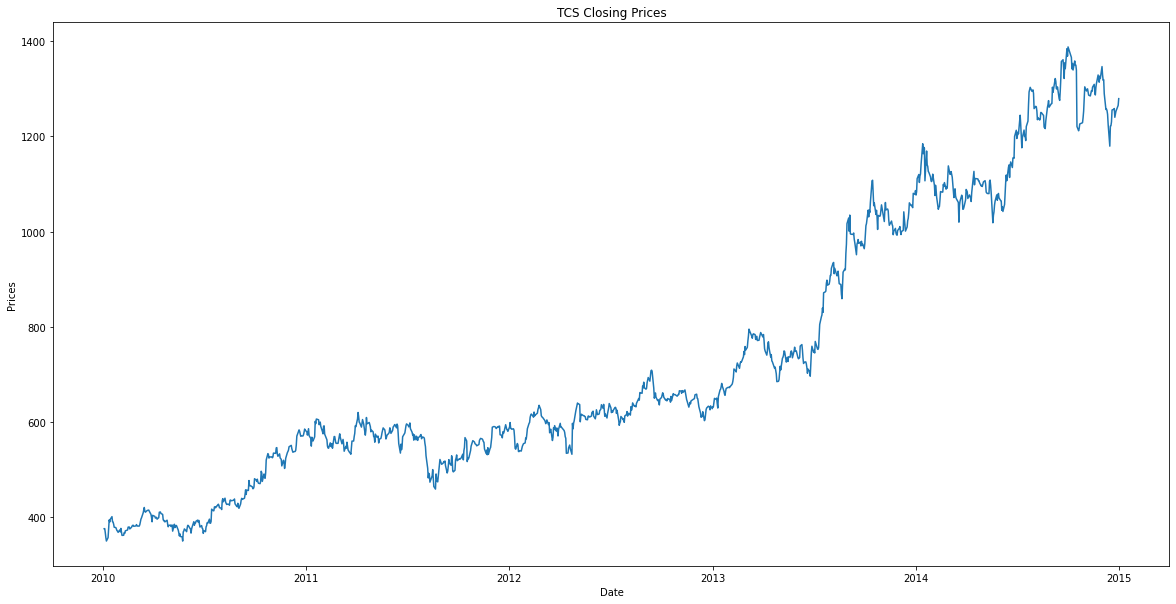

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(dataset['Close'])
plt.xlabel('Date')
plt.ylabel('Prices')
plt.title('TCS Closing Prices')

In [ ]:
import math
from sklearn.preprocessing import MinMaxScaler 
import numpy as np


close = dataset['Close']
arr_close = close.values
scale = MinMaxScaler(feature_range=(0,1))
scaled = scale.fit_transform(arr_close.reshape(-1,1))
#train_data_len = math.ceil(len(arr_close)*0.8)
train_data_len = math.ceil(len(arr_close)-14)
train_data = scaled[0:train_data_len, :]

print(len(arr_close), train_data_len)
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


1233 1219


In [ ]:
test_data = scaled[train_data_len-60: , : ]
x_test = []
y_test = arr_close[train_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

print(x_test[0])

[[0.93046888]
 [0.91548846]
 [0.91462152]
 [0.9190771 ]
 [0.89533006]
 [0.89174153]
 [0.91117741]
 [0.93579151]
 [0.97042454]
 [0.97408538]
 [0.95790075]
 [0.93612866]
 [0.96772718]
 [0.9558777 ]
 [0.99631505]
 [0.98121433]
 [1.        ]
 [0.97868549]
 [0.95549233]
 [0.96649886]
 [0.95322844]
 [0.97155654]
 [0.96319928]
 [0.96319928]
 [0.95303582]
 [0.83890071]
 [0.83030272]
 [0.83516766]
 [0.84405482]
 [0.84660765]
 [0.85693987]
 [0.87016207]
 [0.89528184]
 [0.91919752]
 [0.91076805]
 [0.91517541]
 [0.90233858]
 [0.9007971 ]
 [0.90611973]
 [0.91144236]
 [0.90985278]
 [0.91852309]
 [0.92423109]
 [0.90860047]
 [0.90277205]
 [0.91804141]
 [0.92608551]
 [0.94320939]
 [0.93275687]
 [0.92856625]
 [0.94109003]
 [0.93612866]
 [0.96018875]
 [0.94301677]
 [0.93244383]
 [0.93369613]
 [0.90527678]
 [0.87341344]
 [0.87440091]
 [0.87105311]]


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=100)

Epoch 1/100
1159/1159 [==============================] - 20s 13ms/step - loss: 0.0023
Epoch 2/100
1159/1159 [==============================] - 10s 9ms/step - loss: 9.2644e-04
Epoch 3/100
1159/1159 [==============================] - 11s 9ms/step - loss: 7.5218e-04
Epoch 4/100
1159/1159 [==============================] - 10s 9ms/step - loss: 5.2475e-04
Epoch 5/100
1159/1159 [==============================] - 10s 9ms/step - loss: 6.2340e-04
Epoch 6/100
1159/1159 [==============================] - 10s 9ms/step - loss: 4.5021e-04
Epoch 7/100
1159/1159 [==============================] - 11s 9ms/step - loss: 4.5539e-04
Epoch 8/100
1159/1159 [==============================] - 10s 9ms/step - loss: 4.7009e-04
Epoch 9/100
1159/1159 [==============================] - 10s 9ms/step - loss: 3.7422e-04
Epoch 10/100
1159/1159 [==============================] - 10s 9ms/step - loss: 5.3503e-04
Epoch 11/100
1159/1159 [==============================] - 10s 9ms/step - loss: 3.8347e-04
Epoch 12/100
1159/1159

In [ ]:
predictions = model.predict(x_test)
print(predictions)
predictions = scale.inverse_transform(predictions)

rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1/1 [==============================] - 1s 698ms/step
[[0.8557341 ]
 [0.8469275 ]
 [0.82702947]
 [0.78639674]
 [0.8224075 ]
 [0.82866275]
 [0.8307345 ]
 [0.8506274 ]
 [0.85350883]
 [0.8544946 ]
 [0.8402188 ]
 [0.85063434]
 [0.86048126]
 [0.86223656]]


19.896231515066965

In [ ]:
print(predictions)

[[1238.0485]
 [1228.907 ]
 [1208.2523]
 [1166.0745]
 [1203.4546]
 [1209.9476]
 [1212.0981]
 [1232.7476]
 [1235.7385]
 [1236.7617]
 [1221.9431]
 [1232.7548]
 [1242.9761]
 [1244.7982]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


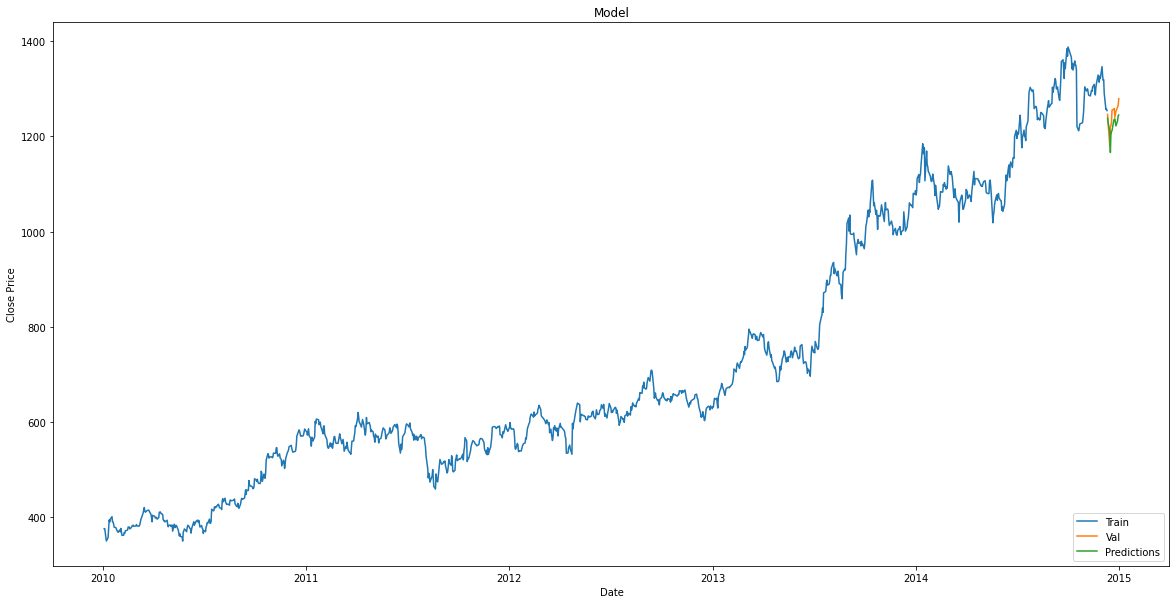

In [ ]:
data = dataset.filter(['Close'])
train = data[:train_data_len]
validation = data[train_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
a = []
for i in range(len(predictions)):
  a.append(abs(predictions[i][0] - y_test[i]))
print(max(a), min(a), sum(a)/len(a))
print(predictions, y_test)

55.4505615234375 3.188232421875 24.536856515066965
[[1238.0485]
 [1228.907 ]
 [1208.2523]
 [1166.0745]
 [1203.4546]
 [1209.9476]
 [1212.0981]
 [1232.7476]
 [1235.7385]
 [1236.7617]
 [1221.9431]
 [1232.7548]
 [1242.9761]
 [1244.7982]] [1246.07495117 1225.34997559 1179.32495117 1221.52502441 1222.05004883
 1230.34997559 1255.27502441 1256.69995117 1258.34997559 1239.94995117
 1252.5        1261.44995117 1265.02502441 1279.125     ]
